In [2]:
import matplotlib.pyplot as plt 
import pylab
from pylab import rcParams 
import networkx as nx 
import numpy as np 

# set the graph display size as 10 by 10 inches 
rcParams['figure.figsize'] = 10, 10 
G = nx.DiGraph()

 # Add the edges and weights 

G.add_edges_from([('K', 'I'),('R','T'),('V','T')], weight=3)
G.add_edges_from([('T','K'),('T','H'),('I','T'),('T','H')], weight=4)
G.add_edges_from([('I','R'),('H','N')], weight=5)
G.add_edges_from([('R','N')], weight=6)

In [3]:
val_map = {'K': 1.5, 'I': 0.9, 'R': 0.6, 'T': 0.2} 
values = [val_map.get(node, 1.0) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight']) 
                for u,v,d in G.edges(data=True)])

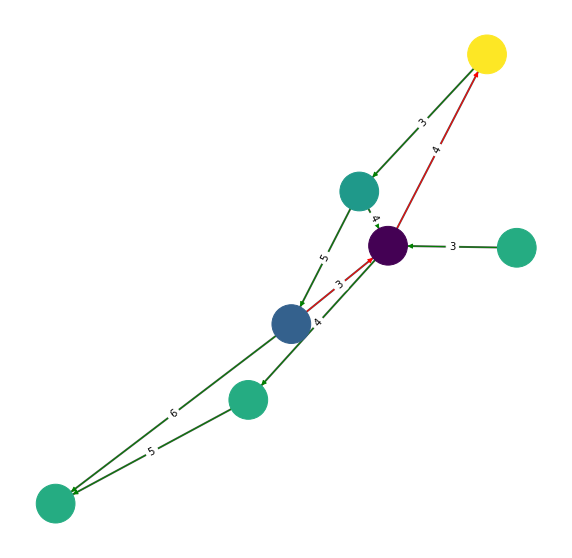

In [4]:
red_edges = [('R','T'),('T','K')]
edge_colors = ['green' if not edge in red_edges else 'red' for edge in
G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edges(G,pos,width=2.0,alpha=0.65)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors, edge_cmap=plt.cm.Reds)
pylab.show()

['i', 'a', 'h']


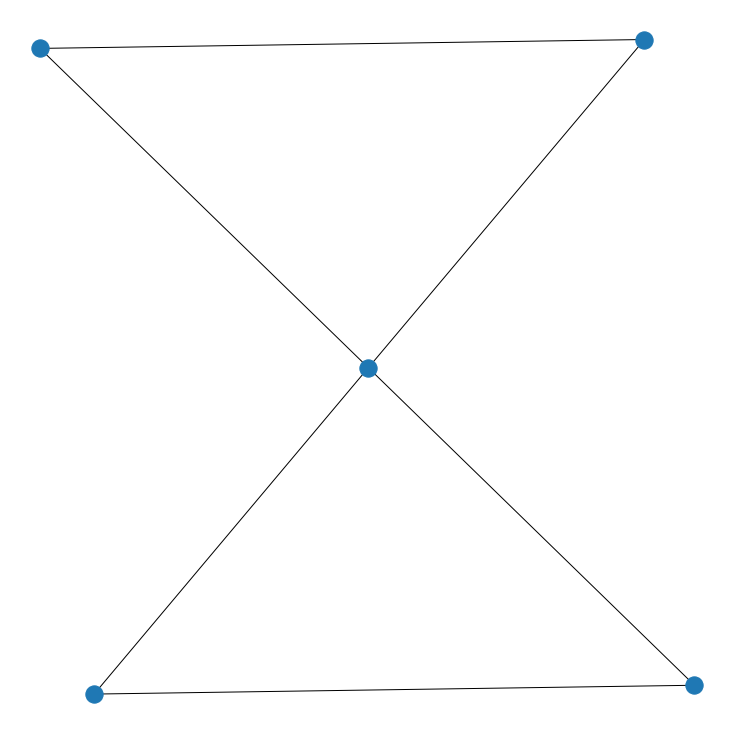

In [5]:
import networkx as nx
g = nx.Graph()
g.add_edge('m','i',weight=1)
g.add_edge('i','a',weight=1)
g.add_edge('m','a',weight=1)
g.add_edge('a','e',weight=1)
g.add_edge('e','h',weight=1)
g.add_edge('a','h',weight=1)
print(nx.shortest_path(g,'i','h'))
nx.draw(g)

[1, 2, 3] [(2, 3)] 3 1
[(2, 3), (3, 2)]
{'weight': 7.5}
[(0, 1, {'weight': 3.0}), (1, 2, {'weight': 7.5}), (2, 3, {'color': 5})]
[(0, {}), (1, {'size': 10}), (2, {}), (3, {})]
[(1, 3, {'weight': 1}), (2, 3, {'weight': 5}), (2, 5, {'weight': 3}), (3, 6, {'weight': 4}), (4, 6, {'weight': 2})]
[0, 1, 2, 3, 4]
{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 2, 5], 6: [1, 3, 6]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 5: [2, 5], 4: [2, 1, 4], 6: [2, 3, 6]}, 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 4], 5: [3, 5], 6: [3, 6]}, 4: {4: [4], 1: [4, 1], 3: [4, 3], 6: [4, 6], 2: [4, 1, 2], 5: [4, 3, 5]}, 5: {5: [5], 2: [5, 2], 3: [5, 3], 6: [5, 6], 1: [5, 2, 1], 4: [5, 3, 4]}, 6: {6: [6], 3: [6, 3], 4: [6, 4], 5: [6, 5], 1: [6, 3, 1], 2: [6, 3, 2]}}
{1: {1: 5.269088285128803, 2: 4.612819690152336, 3: 6.378804644631198, 4: 4.612819690152337, 5: 3.8717917686287584, 6: 3.871791768628758}, 2: {1: 4.612819690152336, 2: 5.2690882851288015, 3: 6.378804644631196, 4: 3.871791768628759, 5: 4.612819690152335,

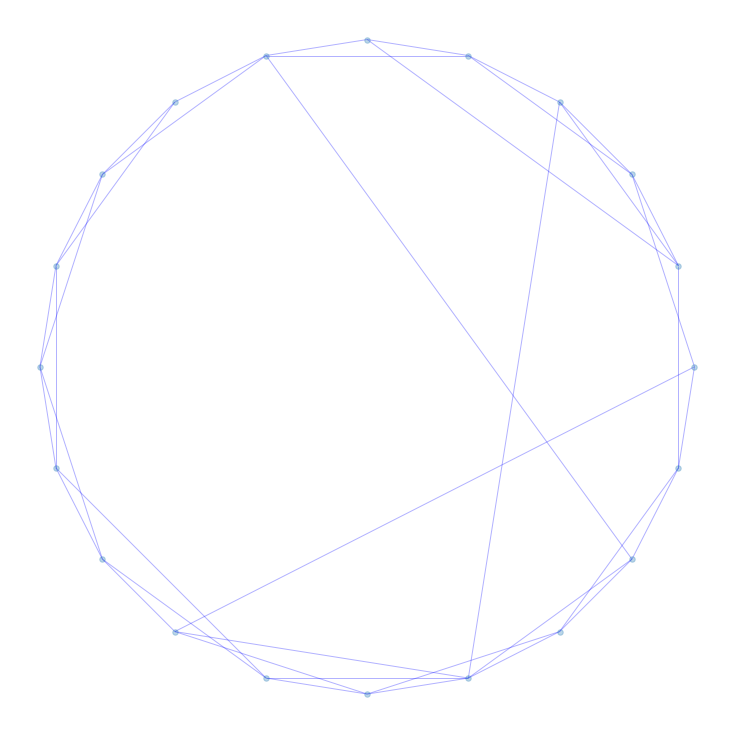

In [6]:
import networkx as nx

oo = float('inf')

# 创建无向图
G = nx.Graph()
G.add_node(1) # 添加节点１
G.add_edge(2,3) #　添加节点２，３并链接２３节点
print(G.nodes, G.edges, G.number_of_nodes(), G.number_of_edges())

# 创建有向图
G = nx.DiGraph() 
G.add_edge(2, 3)
G.add_edge(3, 2)
G.to_undirected()  # 转换成无向图
print(G.edges)

# 加权图
G = nx.DiGraph()
G.add_weighted_edges_from([(0,1,3.0), (1,2,7.5)]) # 给０１边加权３，　１２边加权７．５
print(G.get_edge_data(1,2))  # 获得１２边的属性

G.add_weighted_edges_from([(2,3,5)], weight='color')
print(G.edges.data())

G.nodes[1]['size'] = 10
print(G.nodes.data())


import matplotlib.pyplot as plt

g_data = [(1, 2, 6), (1, 3, 1), (1, 4, 5),
          (2, 3, 5),  (2, 5, 3),
          (3, 4, 5), (3, 5, 6), (3, 6, 4), (4, 6, 2),
          (5, 6, 6)]

# 最小生成树
g = nx.Graph()
g.add_weighted_edges_from(g_data)
tree = nx.minimum_spanning_tree(g, algorithm='prim')
print(tree.edges(data=True))

# 最短路径
G = nx.path_graph(5)  # 0-1-2-3-4链
print(nx.dijkstra_path(G, 0, 4))

# 所有节点之间的最短路径
G = nx.Graph()
G.add_weighted_edges_from(g_data)
gen = nx.all_pairs_shortest_path(G)
print(dict(gen))

# 各点之间可达性
G = nx.Graph()
G.add_weighted_edges_from(g_data)
print(nx.communicability(G))

# 获得图中非连通点的列表
G = nx.Graph()
G.add_edge(1,2)
G.add_node(3)
print(list(nx.isolates(G)))

# 遍历
G = nx.Graph()
G.add_weighted_edges_from(g_data)
d_gen = nx.dfs_edges(G,1)  #  按边深度搜索, 1为起点
b_gen = nx.bfs_edges(G,1)
print(list(d_gen), list(b_gen))
print(nx.dfs_tree(G,1).nodes())  # 按点深搜


from networkx.algorithms.flow import shortest_augmenting_path
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge('x','a', capacity=3.0)
G.add_edge('x','b', capacity=1.0)
G.add_edge('a','c', capacity=3.0)
G.add_edge('b','c', capacity=5.0)
G.add_edge('b','d', capacity=4.0)
G.add_edge('d','e', capacity=2.0)
G.add_edge('c','y', capacity=2.0)
G.add_edge('e','y', capacity=3.0)

# 将参数画到图上
pos = nx.spring_layout(G)
capacity = nx.get_edge_attributes(G, 'capacity')
# nx.draw_networkx_nodes(G, pos)
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,capacity)

# 最大流
flow_value, flow_dict = nx.maximum_flow(G,'x', 'y', flow_func=shortest_augmenting_path)
print(flow_value, flow_dict)
# plt.show()


# 最小成本流
G = nx.DiGraph()
G.add_node('a', demand = -5)
G.add_node('d', demand = 5)
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)
flow_cost, flow_dict = nx.capacity_scaling(G)
print(flow_cost, flow_dict)

# 欧拉回路  一个无向图G,一条路径经过图G的每一条边,且仅经过一次,这条路径称为欧拉路径．如果起点和终点同一点，则为欧拉回路
# 无向图：每个顶点的度数都是偶数则存在欧拉回路
# 有向图：每个顶点的入度都等于出度则存在欧拉回路
DG = nx.DiGraph({0: [3], 1: [2], 2: [3], 3: [0, 1]})
G = nx.Graph({0: [1,2], 1: [0,2], 2: [0,1,3,4], 3: [2,4], 4:[2,3]})
print(nx.is_eulerian(DG))
print(nx.is_eulerian(G))
print(list(nx.eulerian_circuit(DG)))
print(list(nx.eulerian_circuit(G)))

# 最小点割集
node_cut = nx.minimum_node_cut(G, flow_func=shortest_augmenting_path)
print(node_cut)

# 对于带权无向图边切割，得到最小切割权之和，以及两个分离区域
G = nx.Graph()
G.add_edge('x','a', weight=3)
G.add_edge('x','b', weight=1)
G.add_edge('a','c', weight=3)
G.add_edge('b','c', weight=5)
G.add_edge('b','d', weight=4)
G.add_edge('d','e', weight=2)
G.add_edge('c','y', weight=2)
G.add_edge('e','y', weight=3)

cut_value, partition = nx.stoer_wagner(G)
print(cut_value, partition)

# 最大权重匹配　匈牙利、KM算法
G = nx.Graph()
G.add_weighted_edges_from([('A', 'a', 3), ('A', 'c', 4), ('B', 'a', 2), ('B', 'b', 1), ('B', 'c', 3), ('C', 'c', 5)])
print(nx.max_weight_matching(G))

# 拓扑排序
G = nx.DiGraph()
G.add_edge('x','a', weight=3)
G.add_edge('a','c', weight=3)
G.add_edge('b','c', weight=5)
G.add_edge('b','d', weight=4)
G.add_edge('d','e', weight=2)
G.add_edge('c','y', weight=2)
G.add_edge('e','y', weight=3)
print(list(nx.topological_sort(G)))

# 最小成本最大流
G = nx.DiGraph()
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)
print(nx.max_flow_min_cost(G, 'a', 'd'))


#复杂网络生成
# ER随机图   # 随机生成20个节点，节点间的连接概率都是0.2
# ER = nx.random_graphs.erdos_renyi_graph(20, 0.2)
# pos = nx.shell_layout(ER)
# nx.draw(ER, pos, with_labels=False,edge_color='b', alpha=0.3, node_size=30)
# plt.show()

# WS小世界网络  生成一个含有n个节点、每个节点有k个邻居、以概率p随机化重连边的WS小世界网络。
WS = nx.random_graphs.watts_strogatz_graph(20, 4, 0.3)
pos = nx.circular_layout(WS)
nx.draw(WS, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
plt.show()


# BA无标度网络 生成一个含有n个节点、每次加入m条边的BA无标度网络
# BA = nx.random_graphs.barabasi_albert_graph(10,2)
# pos = nx.spring_layout(BA)
# nx.draw(BA, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
# plt.show()

# 扩展ＢＡ无标度网络  节点数，添加新边数，两点间添加边的概率，边重连的概率
# ExBA = nx.random_graphs.extended_barabasi_albert_graph(200, 4, 0.4, 0.2)
# pos = nx.spring_layout(ExBA)
# nx.draw(ExBA, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
# plt.show()

In [7]:
# capacity = nx.get_edge_attributes(G, 'capacity') 这句太棒了

nodes: [2, 3]
edges: [(2, 3)]
number of edges: 1


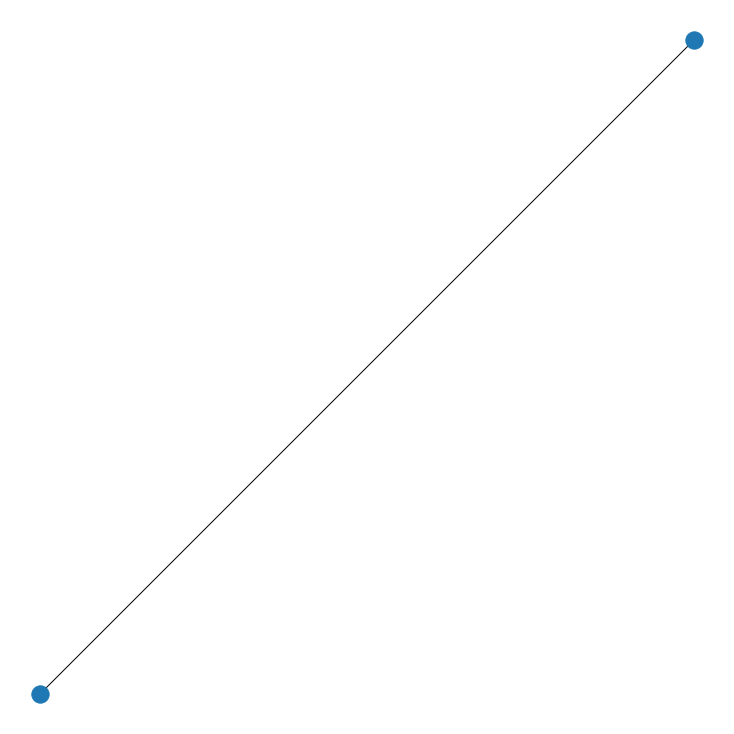

In [8]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()                 #建立一个空的无向图G

G.add_node(2)                  #添加一个节点1
G.add_edge(2,3)                #添加一条边2-3（隐含着添加了两个节点2、3）
G.add_edge(3,2)                #对于无向图，边3-2与边2-3被认为是一条边
print ("nodes:", G.nodes())     #输出全部的节点： [1, 2, 3]
print ("edges:", G.edges())      #输出全部的边：[(2, 3)]
print ("number of edges:", G.number_of_edges() )  #输出边的数量：1
nx.draw(G)
# plt.savefig("wuxiangtu.png")
plt.show()

In [9]:
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)                  #加点
G.add_nodes_from([3,4,5,6])    #加点集合
G.add_cycle(G,[1,2,3,4])         #加环

G.add_edge(1,3)     
G.add_edges_from([(3,5),(3,6),(6,7)])  #加边集合
nx.draw(G)
plt.show()

AttributeError: 'DiGraph' object has no attribute 'add_cycle'

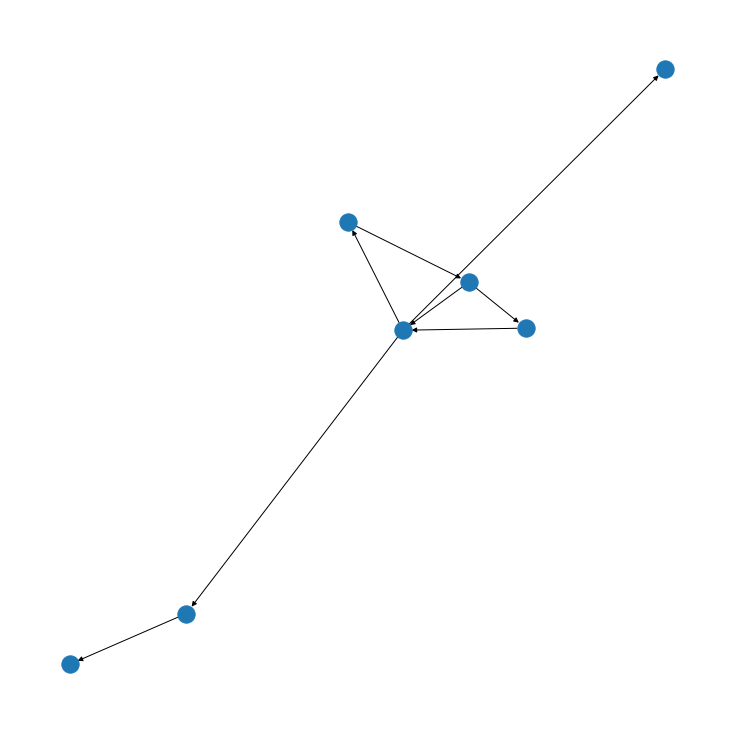

In [21]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_nodes_from([3,4,5,6])
nx.add_cycle(G,[1,2,3,4])
G.add_edge(1,3)
G.add_edges_from([(3,5),(3,6),(6,7)])
nx.draw(G)
# plt.savefig("youxiangtu.png")

plt.show()

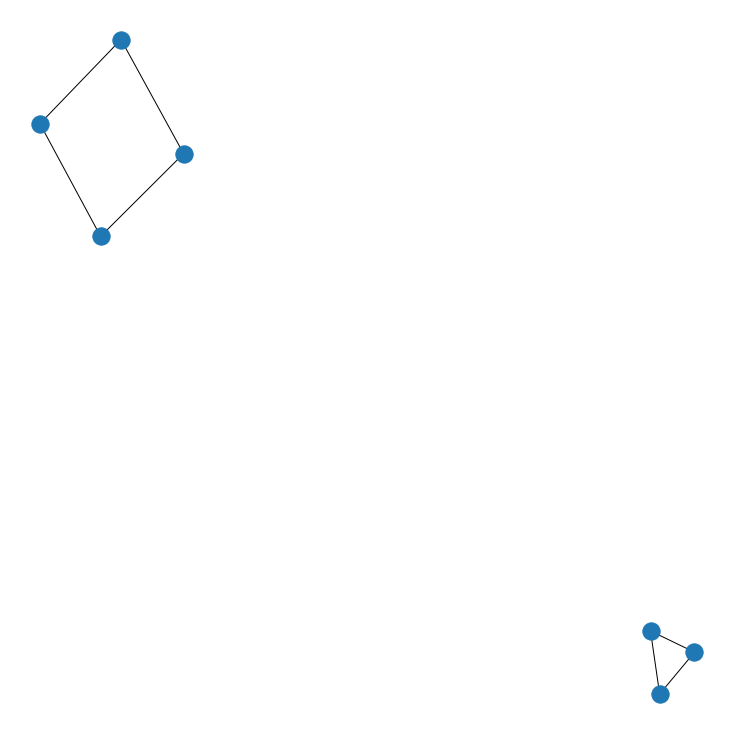

In [18]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [10, 11, 12], weight=7)
nx.draw(G)

In [41]:
Gn = nx.Graph()

edges_list = [('A', '1'), ('A', '2'), ('A', '3'), ('A', '4'), ('1', '2'), ('1', '5'), ('1', '6'), ('2', '6'), ('2', '3'), ('3', '7'), ('3', '4'), ('4', '7'), ('4', '8'), ('5', '6'), ('5', 'B'), ('6', '7'), ('6', 'B'), ('7', '8'), ('7', 'B'), ('8', 'B')]

pos = {
        'A':(-2,0),
        '1':(-1,1.5),
        '2':(-1,0.5),
        '3':(-1,-0.5),
        '4':(-1,-1.5),
        '5':(0,1.5),
        '6': (0,0.5),
        '7':(0,-0.5),
        '8':(0,-1.5),
        'B':(1,-0),
       }

In [50]:
Gn.add_edges_from(edges_list, capacity=1.0)

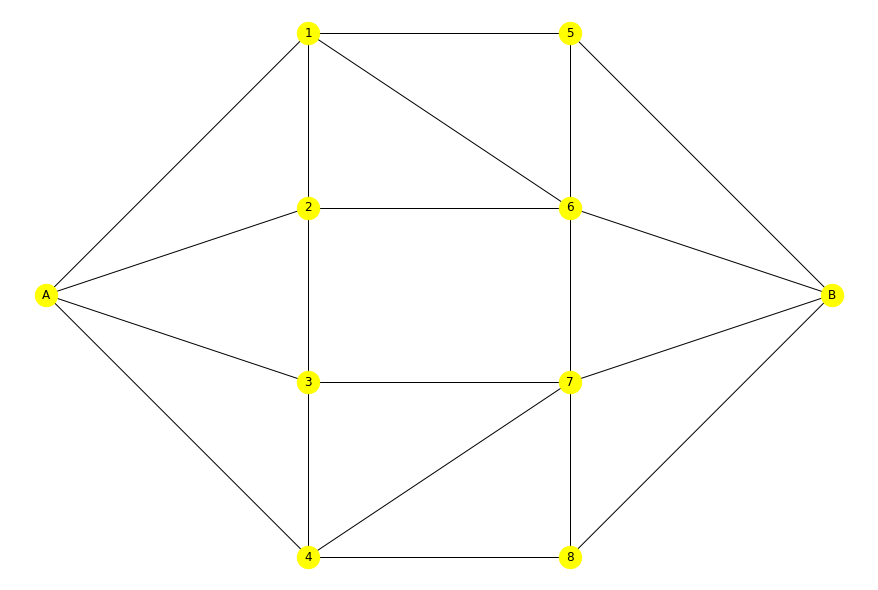

In [51]:
plt.figure(figsize=(12,8))
nx.draw(Gn, pos= pos,with_labels=True,node_size=500,node_color='yellow')

In [52]:
cut_value, partition = nx.minimum_cut(Gn,  "A", "B")
reachable, non_reachable = partition

In [53]:
cutset = set()
for u, nbrs in ((n, Gn[n]) for n in reachable):
    cutset.update((u, v) for v in nbrs if v in non_reachable)
print(sorted(cutset))

cut_value == sum(Gn.edges[u, v]["capacity"] for (u, v) in cutset)

[('5', 'B'), ('6', 'B'), ('7', 'B'), ('8', 'B')]


True